# [Documentação dos modelos](https://scikit-learn.org/stable/supervised_learning.html)

# Read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

base = pd.read_csv('cat_breeds.csv', sep=';')
base

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
0,Angora,0.25,3,female,False,19,2.0,white,solid,blue,False,wet,46,16,France,43.296482,5.369780
1,Angora,0.33,4,male,False,19,2.5,white,solid,blue,False,wet,48,16,France,43.611660,3.877710
2,Angora,0.50,6,male,False,20,2.8,black,solid,green,False,wet,41,11,France,44.837789,-0.579180
3,Angora,0.50,6,female,False,21,3.0,white,solid,blue,False,wet,24,8,France,43.611660,3.877710
4,Angora,0.50,6,male,False,21,3.0,red/cream,tabby,green,False,wet,51,10,France,48.864716,2.349014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,Maine coon,0.17,2,female,False,15,1.2,white,solid,blue,False,wet,35,20,UK,51.507351,-0.127758
1067,Maine coon,0.17,2,female,False,17,1.0,black,bicolor,blue,False,wet,36,19,UK,51.507351,-0.127758
1068,Maine coon,0.17,2,male,False,14,0.7,red/cream,tabby,blue,False,wet,20,20,UK,51.507351,-0.127758
1069,Maine coon,0.17,2,male,False,16,1.1,red/cream,tabby,green,False,wet,34,19,UK,52.486244,-1.890401


In [2]:
base.isnull().sum()

Breed                      0
Age_in_years               0
Age_in_months              0
Gender                     0
Neutered_or_spayed         0
Body_length                0
Weight                     0
Fur_colour_dominant        0
Fur_pattern                0
Eye_colour                 0
Allowed_outdoor            0
Preferred_food             0
Owner_play_time_minutes    0
Sleep_time_hours           0
Country                    0
Latitude                   0
Longitude                  0
dtype: int64

# Clean data

In [3]:
features = [
    'Body_length', 'Weight', 'Fur_colour_dominant', 'Fur_pattern', 'Eye_colour', 'Country', 'Latitude', 'Longitude'
]
target = 'Breed'

clean_base = base[features]
clean_target = base[target].copy()

In [4]:
# LABEL ENCODER

from sklearn.preprocessing import LabelEncoder

features_les = {}
base_encoded = clean_base.copy()
for feat in features:
    if base_encoded[feat].dtype == 'object':
        features_les[feat] = LabelEncoder()
        base_encoded[feat] = features_les[feat].fit_transform(base_encoded[feat])

target_le = LabelEncoder()
target_encoded = clean_target.copy()
if(clean_target.dtype == 'object'):
    target_encoded = target_le.fit_transform(target_encoded)
target_encoded = pd.Series(target_encoded, name=target)

# base_encoded
# target_encoded

In [5]:
# STANDARD SCALER

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
base_scaled = scaler.fit_transform(base_encoded)

# pd.DataFrame(base_scaled, columns=features)
# pd.Series(target_scaled.flatten(), name=target)

# Train & Test data

In [6]:
from sklearn.model_selection import train_test_split

x = base_scaled.copy()
y = target_encoded.copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)


In [7]:
import pickle
with open('cat_breeds.pkl', mode = 'wb') as f:
  pickle.dump([x_train, y_train, x_test, y_test], f)

## Trains models

In [8]:
with open('cat_breeds.pkl', 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

### Naive Bayes
- GaussianNB:       features numéricas contínuas (assume distribuição normal)
- MultinomialNB:    features contagens/discretas (como palavras em texto)
- BernoulliNB:      features binárias (0/1)

In [18]:
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(base_encoded, target_encoded, test_size = 0.2, random_state = 11)

g_naivebayes = GaussianNB()
g_naivebayes.fit(x_train, y_train)

model = g_naivebayes
model

,priors,None
,var_smoothing,1e-09


### Decision Tree Classifier

![image.png](https://miro.medium.com/1*TiB4AGb_hQ6W4JkELjvCbQ.png)

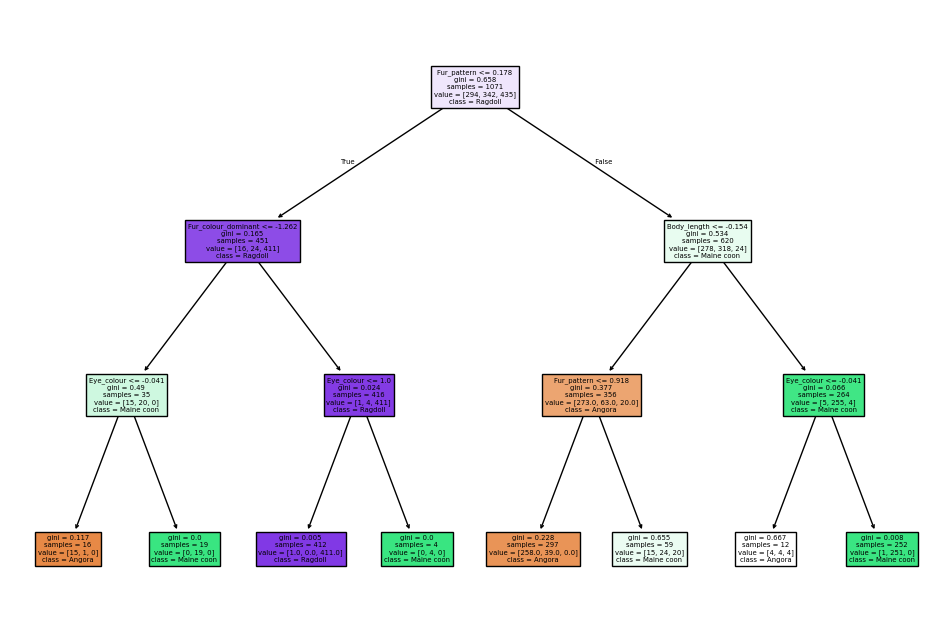

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree.fit(x, y)

model = tree


plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=features, class_names=clean_target.unique(), filled=True)
plt.show()

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

logistic_r = LogisticRegression(random_state = 1,max_iter=100)
logistic_r.fit(x_train, y_train)

model = logistic_r

c:\Users\disrct\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Acurácia
    Mede a porcentagem de tentativas que acertaram em relação a todas as tentativas

```python
    acertos_totais = tp + tn
    tentativas_totais = tp + tn + fp + fn
    acuracia = acertos_totais / tentativas_totais

In [12]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.8418604651162791

## Precisão

Mede quantas vezes ele acertou o valor real em relaçao a todas as vezes que ele disse que era o valor:

```python
    acertos = tp
    tentativas_acertos = tp + fp
    precisao = acertos / tentativas_acertos


In [13]:
from sklearn.metrics import precision_score

pred = model.predict(x_test)
precision = precision_score(y_test, pred, average='macro')
precision

0.8372450897151339

## Recall
Total de dados que eram pra ser verdadeiros e o que foram ditos como verdadeiro
```python
    acertos = tp
    reais = tp + fn
    recall = acertos / reais

In [14]:
from sklearn.metrics import recall_score

pred = model.predict(x_test)
recall = recall_score(y_test, pred, average='macro')
recall

0.8414923526765632

## F1_SCORE
Ele é a média harmônica entre a precisão e o recall. 2(/)

```python
    a = precisao*recall
    b = precisao+recall
    f1_score = 2(a/b)

In [15]:
from sklearn.metrics import f1_score

pred = model.predict(x_test)
f1 = f1_score(y_test, pred, average='macro')
f1

0.8369556374046274

## Matriz de confusão


| Real \ Prev | Classe A | Classe ... | Classe N |
|-------------|----------|------------|----------|
| Classe A    |    10    |    2       |    0     |
| Classe ...  |    1     |    15      |    3     |
| Classe N    |    0     |    2       |    12    |

c:\Users\disrct\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8418604651162791

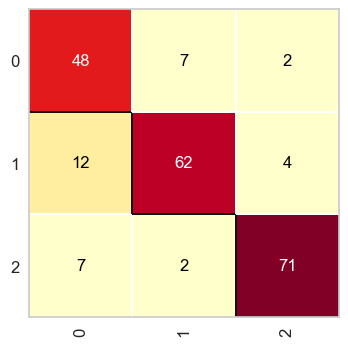

In [16]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(4,4))

pred = model.predict(x_test)
cm = ConfusionMatrix(model)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.72      0.84      0.77        57
           1       0.87      0.79      0.83        78
           2       0.92      0.89      0.90        80

    accuracy                           0.84       215
   macro avg       0.84      0.84      0.84       215
weighted avg       0.85      0.84      0.84       215

